### Tree-based method
- Like regression, trees attempt to approximate a target function
- Most tree-based methods do variable selection automatically
- Decision trees are easier to understand than regression
    - might be good in cases where client stresses they want a model they can understand easily
- Unlike, regression, trees partition the $X$ space into rectangles
- The *decision tree* below attempts to approximate the prediction function
$$f(\text{Outlook, Humidity, Wind}) \rightarrow \text{Play Tennis?}$$

![tennis tree](./tennisTree.png)

- Tree above:
    - each decision node (rectangle) tests one feature (variable)
    - each branch (edge) selects one value for the feature above
    - each leaf node (circle) predicts the label (outcome)

### Spam Data
From the authors:
- The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 
- Our collection of spam e-mails came from our postmaster and individuals who had filed spam
- Our collection of non-spam e-mails came from filed work and personal e-mails
    - hence the word 'george' and the area code '650' are indicators of non-spam
- These are useful when constructing a personalized spam filter
- One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter
- Source: Cranor, Lorrie F., LaMacchia, Brian A. Spam! Communications of the ACM, 41(8):74-83, 1998.

**Attribute Information:**

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 

48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail

Variables:
- outcome: 1, 0.    | spam, non-spam classes

1. word_freq_make:         continuous.
2. word_freq_address:      continuous.
3. word_freq_all:          continuous.
4. word_freq_3d:           continuous.
5. word_freq_our:          continuous.
6. word_freq_over:         continuous.
7. word_freq_remove:       continuous.
8. word_freq_internet:     continuous.
9. word_freq_order:        continuous.
10. word_freq_mail:         continuous.
11. word_freq_receive:      continuous.
12. word_freq_will:         continuous.
13. word_freq_people:       continuous.
14. word_freq_report:       continuous.
15. word_freq_addresses:    continuous.
16. word_freq_free:         continuous.
17. word_freq_business:     continuous.
18. word_freq_email:        continuous.
19. word_freq_you:          continuous.
20. word_freq_credit:       continuous.
21. word_freq_your:         continuous.
22. word_freq_font:         continuous.
23. word_freq_000:          continuous.
24. word_freq_money:        continuous.
25. word_freq_hp:           continuous.
26. word_freq_hpl:          continuous.
27. word_freq_george:       continuous.
28. word_freq_650:          continuous.
29. word_freq_lab:          continuous.
30. word_freq_labs:         continuous.
31. word_freq_telnet:       continuous.
32. word_freq_857:          continuous.
33. word_freq_data:         continuous.
34. word_freq_415:          continuous.
35. word_freq_85:           continuous.
36. word_freq_technology:   continuous.
37. word_freq_1999:         continuous.
38. word_freq_parts:        continuous.
39. word_freq_pm:           continuous.
40. word_freq_direct:       continuous.
41. word_freq_cs:           continuous.
42. word_freq_meeting:      continuous.
43. word_freq_original:     continuous.
44. word_freq_project:      continuous.
45. word_freq_re:           continuous.
46. word_freq_edu:          continuous.
47. word_freq_table:        continuous.
48. word_freq_conference:   continuous.
49. char_freq_;:            continuous.
50. char_freq_(:            continuous.
51. char_freq_\[:            continuous.
52. char_freq_!:            continuous.
53. char_freq_\$:            continuous.
54. char_freq_#:            continuous.
55. capital_run_length_average: continuous.
56. capital_run_length_longest: continuous.
57. capital_run_length_total:   continuous.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
col_names = [f'X{num}' for num in range(1,58)] # remember zero indexing
col_names.append('Y')
df = pd.read_csv(url, names=col_names, )
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')
df.head()

Number of rows: 4601
Number of columns: 58


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


- Looking data overview
- we know that the data only has continuous variables
- these data have many columns, so it isn't feasible to show many plots
- I'm showing the first 10

In [2]:
df.describe().transpose().head(10)

,count,mean,std,min,25%,50%,75%,max
X1,4601.0,0.104553,0.305358,0.0,0.0,0.0,0.00,4.54
X2,4601.0,0.213015,1.290575,0.0,0.0,0.0,0.00,14.28
X3,4601.0,0.280656,0.504143,0.0,0.0,0.0,0.42,5.10
X4,4601.0,0.065425,1.395151,0.0,0.0,0.0,0.00,42.81
X5,4601.0,0.312223,0.672513,0.0,0.0,0.0,0.38,10.00
X6,4601.0,0.095901,0.273824,0.0,0.0,0.0,0.00,5.88
X7,4601.0,0.114208,0.391441,0.0,0.0,0.0,0.00,7.27
X8,4601.0,0.105295,0.401071,0.0,0.0,0.0,0.00,11.11
X9,4601.0,0.090067,0.278616,0.0,0.0,0.0,0.00,5.26
X10,4601.0,0.239413,0.644755,0.0,0.0,0.0,0.16,18.18


In [3]:
# checking for missing data
[name for name, missing in 
 zip(col_names, df.isnull().any(axis=1).to_list()) if missing]


[]

In [4]:
means_dat =df.groupby('Y').mean()
means_dat.transpose().head(10)

Y,0,1
X1,0.073479,0.152339
X2,0.244466,0.164650
X3,0.200581,0.403795
X4,0.000886,0.164672
X5,0.181040,0.513955
X6,0.044544,0.174876
X7,0.009383,0.275405
X8,0.038415,0.208141
X9,0.038049,0.170061
X10,0.167170,0.350507


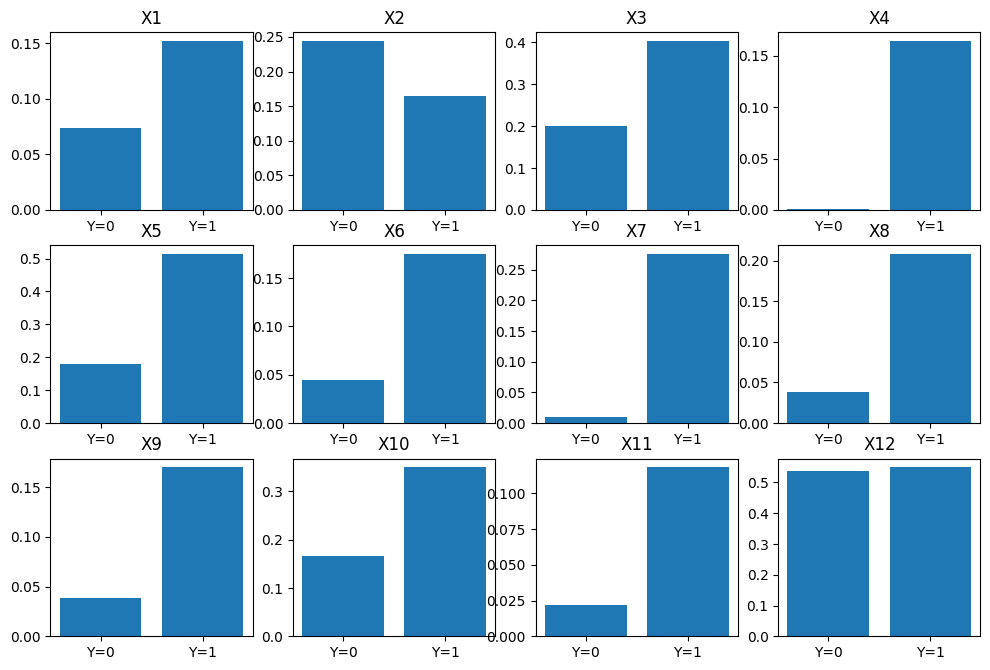

In [5]:
plot_rows, plot_columns = (3,4)
fig, axs = plt.subplots(plot_rows, plot_columns)
axs = axs.ravel()
for itr in range(plot_rows*plot_columns):
    axs[itr].bar(x=['Y=0', 'Y=1'], height=col_names[itr], 
                 data=means_dat)
    axs[itr].set_title(col_names[itr])

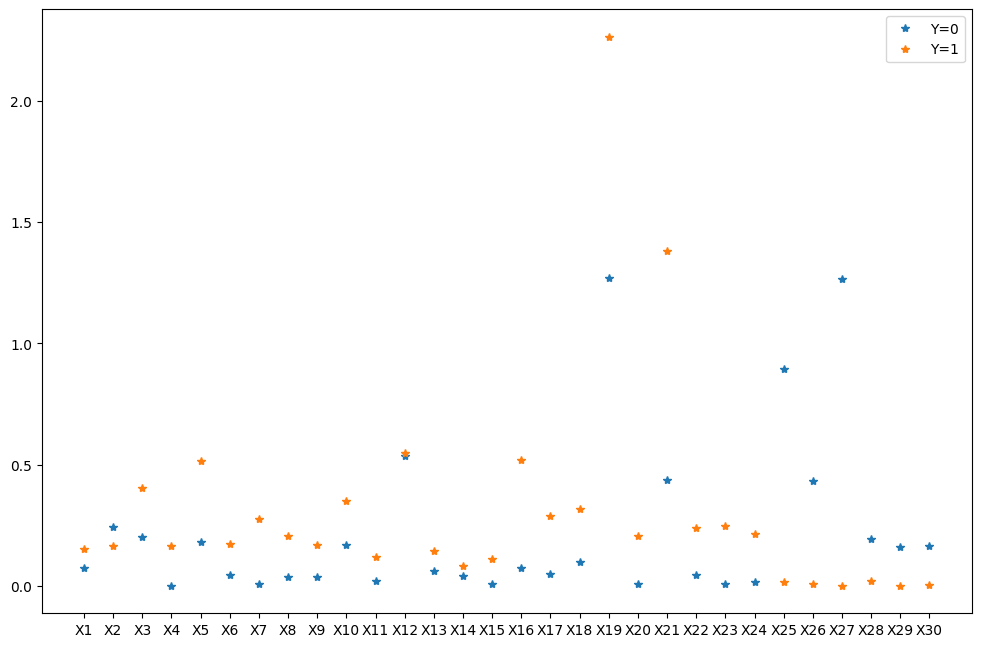

In [6]:
plt.plot(means_dat.iloc[0,0:30], '*', label='Y=0')
plt.plot(means_dat.iloc[1,0:30], '*', label='Y=1')
plt.legend();

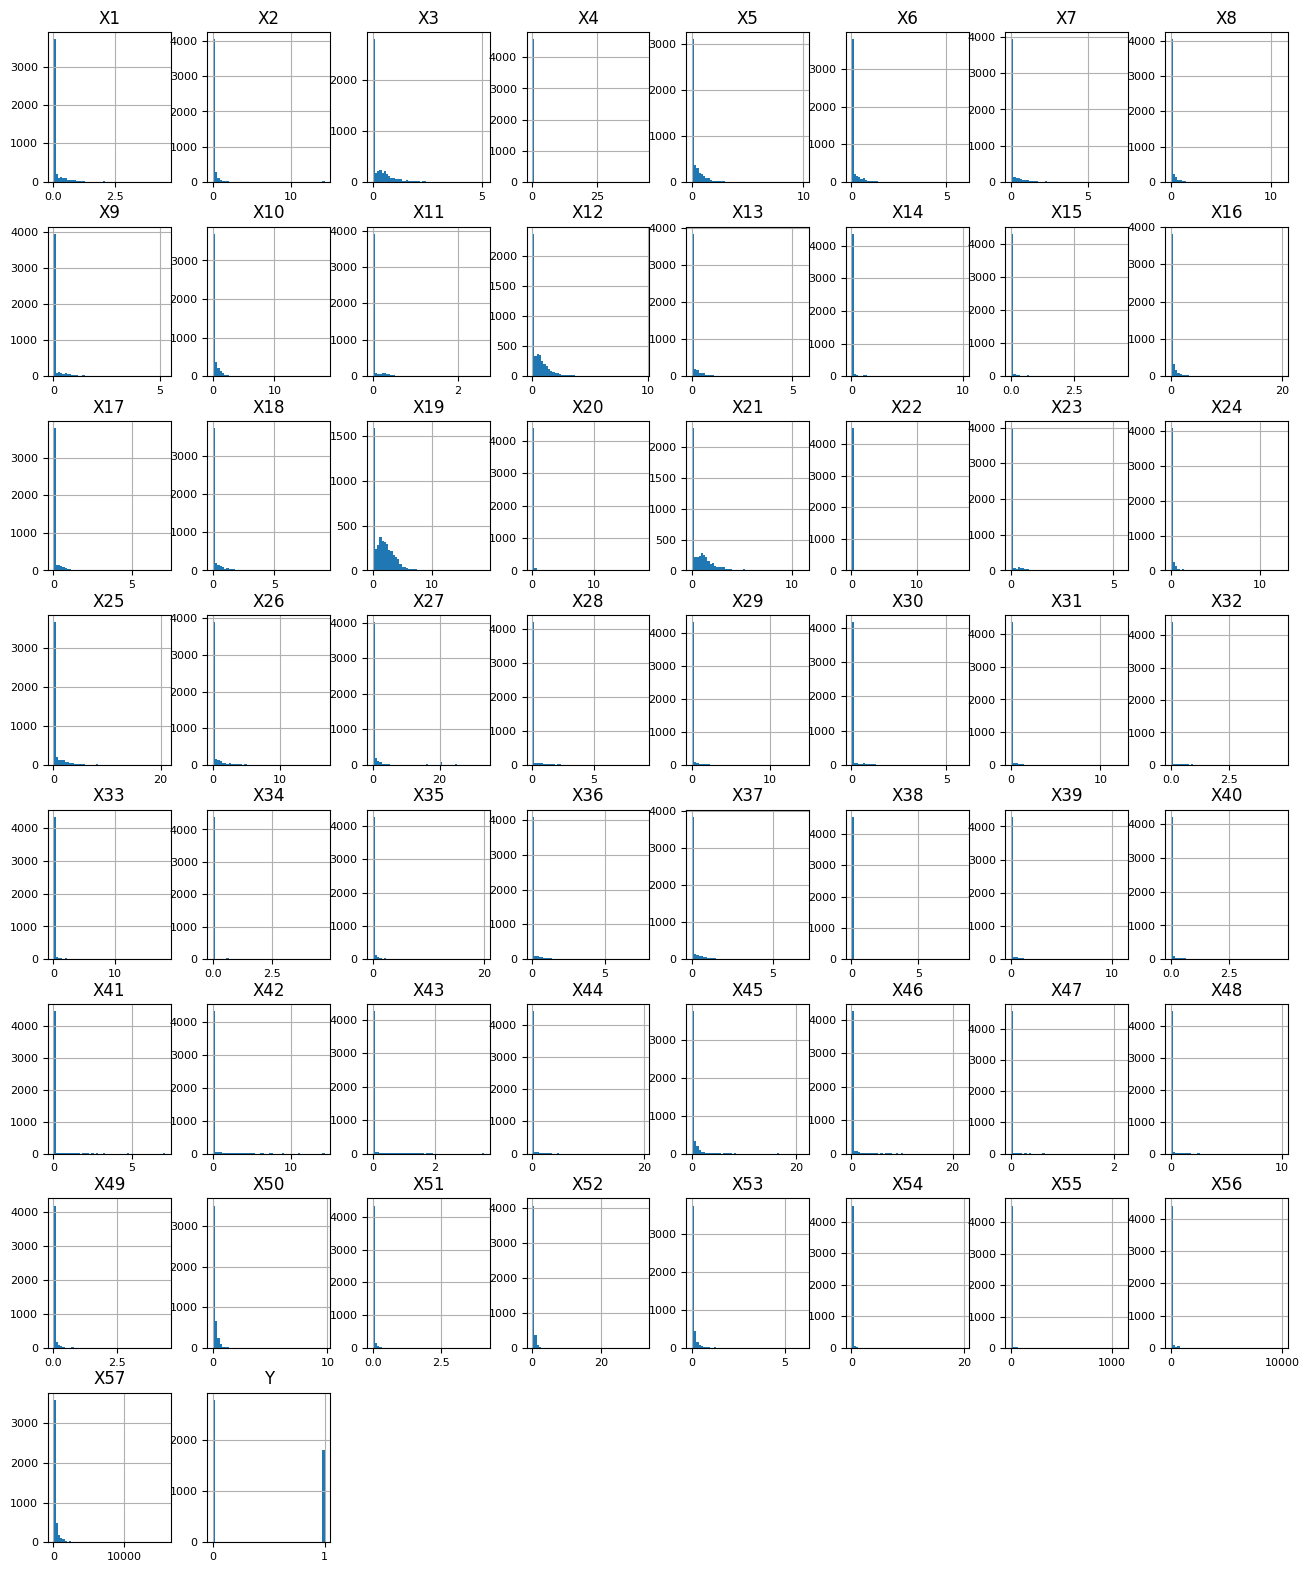

In [7]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

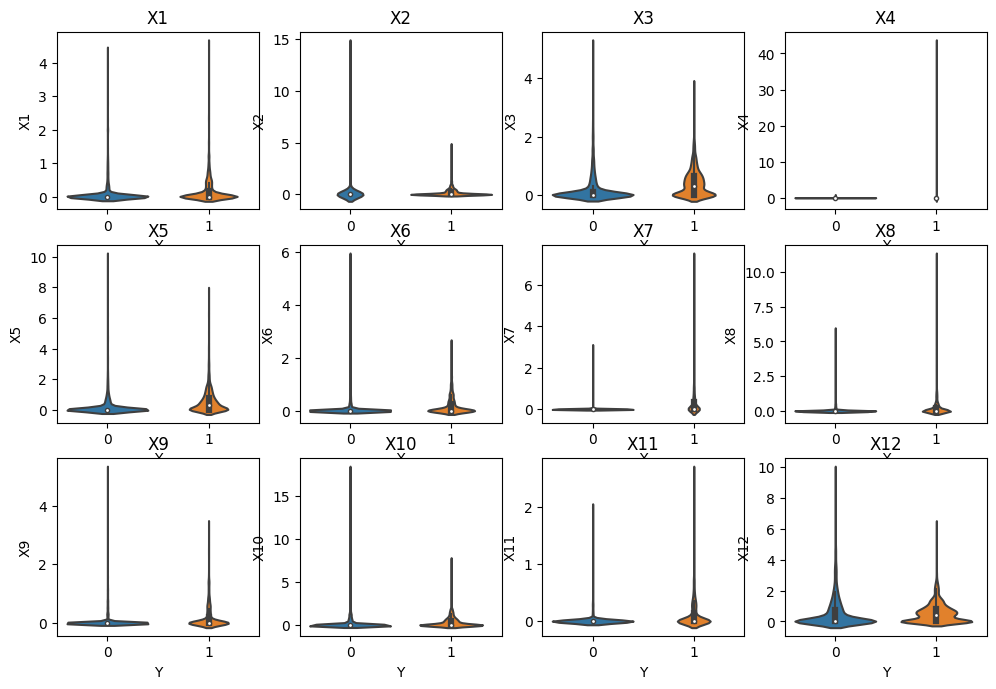

In [8]:
plot_rows, plot_columns = (3,4)
fig, axs = plt.subplots(plot_rows, plot_columns)
axs = axs.ravel()
for itr in range(plot_rows*plot_columns):
    sns.violinplot(ax=axs[itr], x='Y', y=col_names[itr], data=df)
    axs[itr].set_title(col_names[itr])

### Entropy and Mutual Information

- Decision tree are built by choosing one variable at a time to split the tree on
- We can use any appropriate dependence metric
- Mutual information is frequently chosen because it is non-parametric and it is defined for discrete and continuous variables
    - Non-parametric dependence metrics can capture more than linear associations
   
![discCont](./discContPlots.pdf)

**Entropy**

- Definition: Assume $X$ is a random variable with density $p$.  Entropy is defined as
$$ H(X) = -E[\log p(X)]$$
    - If $X$ is discrete then
    $$H(X) = -\sum_{x\in \mathcal X} p(x)\log p(x)$$
    - If $X$ is continuous then
    $$H(X) = -\int_{\mathcal X} p(x)\log p(x) dx$$ where $\mathcal X$ is the domain of $X$ in both the discrete and continuous cases

- For a Bernoulli random variable, it is easy to plot the entropy
- It's typical in information theory to define $0\cdot \log 0 = 0$

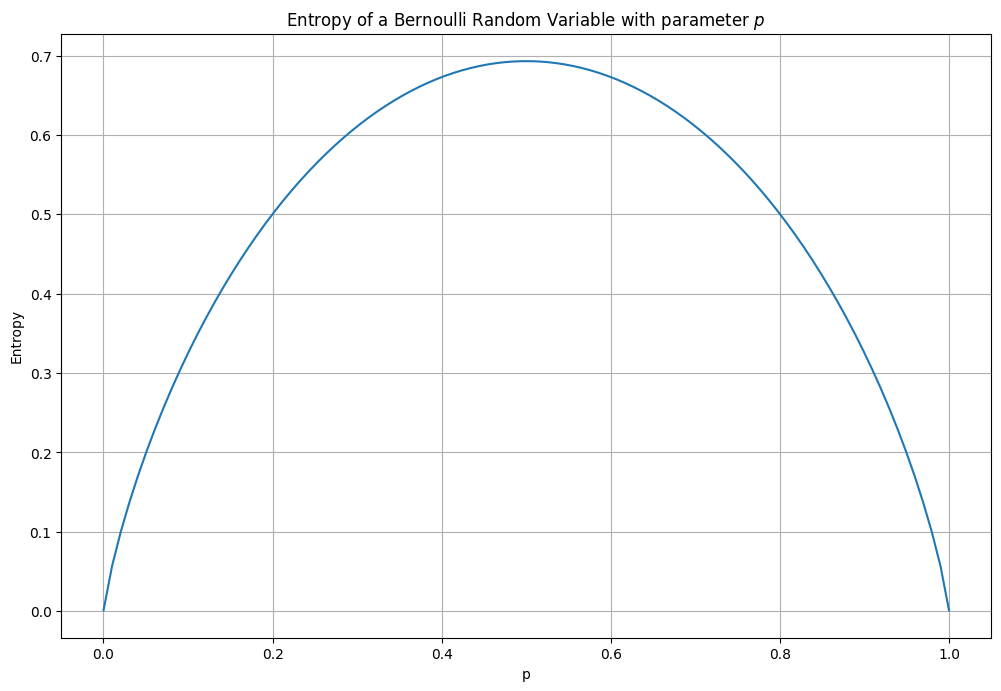

In [9]:
x = np.linspace(0.0001,0.9999,100)
y = - x*np.log(x)-(1-x)*np.log(1-x)
plt.grid(True)
plt.plot(x,y)
plt.xlabel("p")
plt.ylabel("Entropy")
plt.title("Entropy of a Bernoulli Random Variable with parameter $p$");

- We can think of entropy as quantifying the amount of randomness in a random variable
    - Or, how easy is it to predict a random variable
    - Above, a Bernoulli random variable has the most entropy when $p=0.5$
    - and least entropy when there is certainty: $p=0$ or $p=1$
- The entropy scale is not something you need to become familiar with
- It is more common to compare entropies of different random variables
- Entropy was originally defined using $\log_2$
- $H(X) \leq \log n_X$ where $n_X$ is the number of values $X$ can take
- Entropy is easily defined for random vectors, put a vector in place of $X$
- Question: Can entropy be negative?

**Joint entropy** 

- Joint entropy of $X$ and $Y$ is defined as
$$H(X,Y) = -E[\log p(X,Y)]$$
- We can think of the joint entropy of the total amount of randomness in $(X,Y)$
- Easy to prove that if $X$ and $Y$ are independent, then $H(X,Y)=H(X)+H(Y)$
    - recall that $X\perp Y \Leftrightarrow p(x,y)=p(x)p(y)$
- If $X$ and $Y$ are dependent, then $H(X,Y) < H(X)+H(Y)$
- Question: $H(X)\leq H(X,Y)$ or $H(X)\geq H(X,Y)$?

**Conditional Entropy**

- Defined: $$H(Y|X) = -E[\log p(Y|X)]$$ where $p(Y|X) = \frac{p(X,Y)}{p(X)}$
- We can think of $H(Y|X)$ as the amount of randomness or uncertainty in $Y$ after removing any shared randomness with $X$
- Easy to show that $$H(Y|X) = H(X,Y)-H(X)$$
- If $X$ and $Y$ are independent, then $$H(Y|X) = H(Y)$$

**Entropy Estimation for discrete random variables**

- Assume $X_1,\dots, X_n$ is a random sample of size $n$
- Nearly all of the time, we do not know the true distribution of the random variable we are working with
- A common estimation approach is the *plug-in estimator*:
$$\hat H(X) = -\sum_{x\in \mathcal X}\hat p_x \log \hat p_x$$ where $\hat p_x = \frac{\#(X_i=x)}{n}$
- there are other estimators as well, this is one is probably the most frequently used in practice
- There are also estimators for continuous variables but the theory is more complex and they aren't necessary for trees

In [10]:
def estimate_entropy(samp):
    '''
    Input: n x p random variable
    Output: Entropy estimation
    '''
    val, counts = np.unique(samp, return_counts=True, axis=0)
    size = samp.shape[0]
    ent = -np.sum(np.multiply(counts/size, np.log(counts/size)))
    return(ent)

estimate_entropy(df.Y)

0.6705230209876485

### Mutual Information

- Assume $X$ and $Y$ are random variables
    - Let $p(x)$ be the density of $X$, (sometimes denoted $p_X(x)$)
    - Let $p(y)$ be the density of $Y$, (sometimes denoted $p_Y(y)$)
    - Let $p(x,y)$ be the joint density of $X$ and $Y$, (sometimes denoted $(p_{XY}(x,y)$)
- Defined as
$$I(X,Y) = E\left[\log\left(\frac{p(X,Y)}{p(X)p(Y)}\right)\right]$$
- Easy to show that 
$$I(X,Y) = H(X)+H(Y)-H(X,Y)$$
- We can think of $I(X,Y)$ as the randomness shared between $X$ and $Y$, like a Venn Diagram:
<img src="./mutInfoVenn.png" width="300">

- How much information in $Y$ is also contained in $X$ or visa versa
- $I(X,Y)$ large indicates that there is a lot of shared information
    - Knowledge of $X$ is very helpful for predicting $Y$
- $I(X,Y)=0$ indicates that $X$ and $Y$ are independent
    - no shared information, like two coin flips
- Easy to show that $$I(X,Y)\geq 0$$ using Jensen's inequality
    - Jensen's inequality: If $g(x)$ is a convex function, then $g(E[X])\leq E[g(X)]$
    - Because $g(x)=-\log(x)$ is convex, $E[\log Z]\leq \log(E[Z])$ after multiplying both sizes by $-1$.  Using this,
    $$\begin{align}
    -I(X,Y)
    &=-E\left[\log\left(\frac{p_{XY}(X,Y)}{p_X(X)p_Y(Y)}\right)\right] \\
    &= E\left[\log\left(\frac{p_X(X)p_Y(Y)}{p_{XY}(X,Y)}\right)\right] \\
    &\leq \log\left(E\left[\frac{p_X(X)p_Y(Y)}{p_{XY}(X,Y)}\right]\right) \\
    &= \log\left( \int \frac{p_X(x)p_Y(y)}{p_{XY}(x,y)} p_{XY}(x,y) dxdy \right) \\
    &= \log\left( \int p_X(x)p_Y(y) dxdy \right) \\ 
    &= \log\left( \int p_X(x)dx \cdot \int p_Y(y) dy \right) \\ 
    &= \log(1) = 0
    \end{align}$$ So, $I(X,Y)\geq 0$.
- Data processing inequality: if $X \rightarrow Y \rightarrow Z$, then
$$I(X,Y) \geq I(X,Z)$$
- Information Gain: $$H(Y)-H(Y|X)$$
    - This is another way to characterize mutual information $$H(Y)-H(Y|X) = H(Y)-[H(X,Y)-H(X)] = I(X,Y)$$
    - How much information do we gain about $Y$ from using $X$
    - Most of the literature on decision tree talks about information gain rather than mutual information

**Information Estimation**
- Mutual information can be estimated in several ways
- This is also an active area of research
- For now, use $\hat I(X,Y) = \hat H(X)+ \hat H(Y)- \hat H(X,Y)$

In [11]:
def estimate_information(samp):
    '''
    Input: nx2 array
    Output: mutual information estimate
    '''
    x_est = estimate_entropy(samp[:,0])
    y_est = estimate_entropy(samp[:,1])
    xy_est = estimate_entropy(samp)
    return(x_est+y_est-xy_est)


size = 1000
np.random.seed(1234)
x_samp = np.random.poisson(5, size)
y_samp = np.random.binomial(x_samp, 0.5*np.ones(size))
xy_samp = np.column_stack((x_samp,y_samp))

# sanity check
for x,y in zip(x_samp, y_samp):
    if y > x:
        print('error')

estimate_information(xy_samp)

0.45253546546297185

- above: the mutual information between a Poisson random variable ($X$) and Binomial$(n=X, p=0.5)$, here $X\rightarrow Y$
- below: mutual information between an independent Poisson and Binomial
    - why isn't the estimate exactly zero?

In [12]:
np.random.seed(1234)
x_samp = np.random.poisson(5, size)
y_samp = np.random.binomial(10, 0.5, size)
xy_samp = np.column_stack((x_samp,y_samp))

estimate_information(xy_samp)

0.06649931890535843

### Building a basic decision tree

High-level algorithm for building out a (binary) tree

- This algorithm is based on [ID3](https://en.wikipedia.org/wiki/ID3_algorithm)
- Binary: each node has two outgoing branches
- Each node after root, only uses a subset of the rows of data
    - subset is determined by following tree
- At  each node, the algorithm uses subset data to determine best variable to split on next
    - Choosing the variable with the most information on the outcome using data subset
- Assume $Y$ is the outcome, and $\texttt{vars}$ be all predictor variables
- For simplicity, assume that all variables are binary

1. Create empty list called $\texttt{nodes}$, create list of variables, $\texttt{vars}$
2. Add $\texttt{root}$ to $\texttt{nodes}$
3. While $\texttt{nodes}$ is not empty
    1. Pop $\texttt{node}$ from $\texttt{nodes}$ (using either breadth-first)
    2. For $X$ in $\texttt{vars}$: calculate $I(X,Y)$ on data subsetted for node
    3. Split outgoing branches on $X^* = \arg\max_{X\in\texttt{vars}} I(X,Y)$
    4. Partition data: $\{i: X_i^*=0\}$ and $\{i: X_i^*=1\}$
    5. Create branches and allocate data partitions
        1. If data perfectly classified in new: create leaf nodes
        2. Else: add nodes to $\texttt{nodes}$ to be processed
        
Go over presentation slides

- why might this algorithm not be optimal?

### Overfitting, Pruning, and Validation

- Generally, we want our *learner* to make accurate predictions on new data that we have not yet seen
    - learner: machine learning term for model
- The algorithm above will fit the true signal and random noise in the *training data*
    - training data: data used to fit the model
- Over fitting is fitting a learner to the random noise in the data
- How do we determine when over fitting occurs?

**Loss Function**

- Because our response, $Y$, is binary, we will use the *zero-one loss function*:
$$L(\hat Y, Y) = 
\begin{cases}
0 & \text{if } \hat Y = Y\\
1 & \text{if } \hat Y \neq Y
\end{cases}$$
- Note: squared error loss, $L(\hat Y, Y) = (\hat Y-Y)^2$ is what is typically used in linear regression
- *Expected loss*: $$E[L(\hat Y, Y)]$$
- If we use zero-one loss, $$E[L(\hat Y, Y)] = P(\hat Y\neq Y)$$
- Goal: Choose a model $\hat Y = \hat f(x)$ to minimize expected loss:
$$\hat f = \arg\min_{f\in \mathcal F} E[L(f(x), Y)]$$
- Here, $\mathcal F$ is the class of function we are considering
    - For this lecture, $\mathcal F$ is the set of all decision trees we could use
- Note: We can define accuracy as $1-L(\hat Y, Y)$
    - Minimizing loss is the same as maximizing accuracy

**Estimating expected loss**

- Because we never know the *true regression function* (otherwise we would not need to model it), we can estimate expected loss using an average:
$$\text{error}(\hat f) = \frac{1}{n}\sum_{i=1}^n L(y_i, \hat f(x_i))$$
    - For zero-one loss, this is called the error rate
- Consider using all of the data we have to estimate $\hat f$, our decision tree, then using the same data to estimate expected loss
    - Decision trees are very flexible models
    - For any input observation of vector, $x$, a decision tree can choose a particular outcome
    - Because of their flexibility, decision trees can easily overfit
    - In fact, the tree building algorithm above *will* overfit if run until there is perfect classification
    - That is, it is possible to find $\hat f$ such that
    $$\text{error}(\hat f) = 0$$
    | X1 | X2 | Y |
    | --- | --- | --- |
    | 0 | 0 | 17 |
    | 0 | 1 | -42 |
    | 1 | 0 | 0 |
    | 1 | 1 | 5 |
    
    ![simpleoverfittree](./simpleOverfitTree.pdf)
    
    - [Rademacher complexity](https://en.wikipedia.org/wiki/Rademacher_complexity) is the most common way to quantify model flexibility

- Using training data to evaluate expected loss is called *training error*, denoted $$\text{error}_{\text{train}}(\hat f)$$
- A more accurate estimate of error (expected loss) is using new data, that the fitted model has not seen, to estimate error, denoted $$\text{error}_{\text{test}}(\hat f)$$

![treeOverfitting](./treeOverfitting.png)

- Splitting the data into two parts to use one for training and one for testing is called *held-out* validation
- One way to choose a learner (model) is to build/fit several learners on the training data, then choose the model with the best accuracy on the test data

**Pruning**

- How do we stop a tree from over fitting?
- Pruning is the process of collapsing non-leaf nodes within a tree
- Many tree building algorithms first build out a tree as described above, then pruned to limit overfitting

**Cost-Complexity Pruning**

- Let $T_0$ be the full tree built using the algorithm above
- Consider the $m$th leaf (terminal node) of $T_0$ and denote the data in leaf $m$ as $R_m$
- Let $T\subset T_0$ is any tree obtained from pruning $T_0$
- Define the following:
    - $|T|$ is the number of leaf nodes in $T$
    - $N_m = \#\{x_i\in R_m\}$ (number of rows of data)
    - $\hat c_m = \frac{1}{N_m}\sum_{x_i\in R_m} y_i$
    - $Q_m(T) = \frac{1}{N_m}\sum_{x_i\in R_m} (y_i-\hat c_m)^2$
- We say that the cost complexity is $$C_\alpha(T) = \sum_{m=1}^{|T|} N_m Q_m(T) +\alpha|T|$$ where $\alpha\geq 0$ is a tuning parameter controlling the tradeoff between tree size and tree fit
- Large $\alpha$ will results in a smaller tree and small $\alpha$ in a larger tree
- For each value of $\alpha$, there is a unique smallest subtree, $T_\alpha$ which minimizes $C_\alpha(T)$
- Use *weakest link pruning* to find $T_\alpha$:
    - iteratively collapse non-leaf nodes of $T_0$ that give the smallest per-node increase in $\sum_m N_m Q_m(T)$ until only the root is left
    - This process gives a finite sequence of subtrees that must contain $T_\alpha$
- In this setting, $\alpha$ is very similar to the $\lambda$ tuning parameter from splines
- Both parameter determine the balance between accuracy (fit) and model complexity
- This is a common theme in machine learning
- To estimate the best $\alpha$, use five- or ten-fold *cross validation*

**Cross Validation**

- When using held-out validation, there is left over data that was never used to train the model in the test dataset and left over data that we never used to test the model in the training dataset
- Cross validation fixes this by 
    - splitting the observations (rows) in to $k$ *folds* (subsets)
    - training $k$ models each on a subset with a different fold removed
    - testing each of the $k$ models on the fold that was not used for training

![cross validation](./cross-validation.png)

- For each observation, $i=1,\dots, n$, there is one of the $k$ models did not use observation $i$
- We use that model to get $\hat y_i$
- Expected loss is estimated by aggregating the loss or each observation across all folds $$\text{Cross-Validated Loss} = \frac{1}{n}\sum_{i=1}^n L(\hat y_i, y_i)$$
- 5 or 10 fold is what is normally use
    - there is some theoretical work showing that 5- and 10-fold cross validation (CV) are better than LOOCV
    - As far as I know, there is no theoretical work showing which is better between 5- and 10-fold CV
- Once cross validation is complete, we choose the model with the smallest cross-validated error
- It is typical to "re-fit" the optimal model/tuning parameter to the entire dataset used for CV
- In practice, it is common to 
    - set aside some fraction of the observations (5-10%) before CV
    - Choose an optimal model using using CV on the remaining majority of the observations
    - Use the set-aside data to give overall model accuracy/error

![heldout cv](./heldoutCV.png)

- Below: splitting data data into a training set for cross validation and test set

Rows: 4601, Columns: 58
Rows: 230, Columns: 58
Rows: 4371, Columns: 58


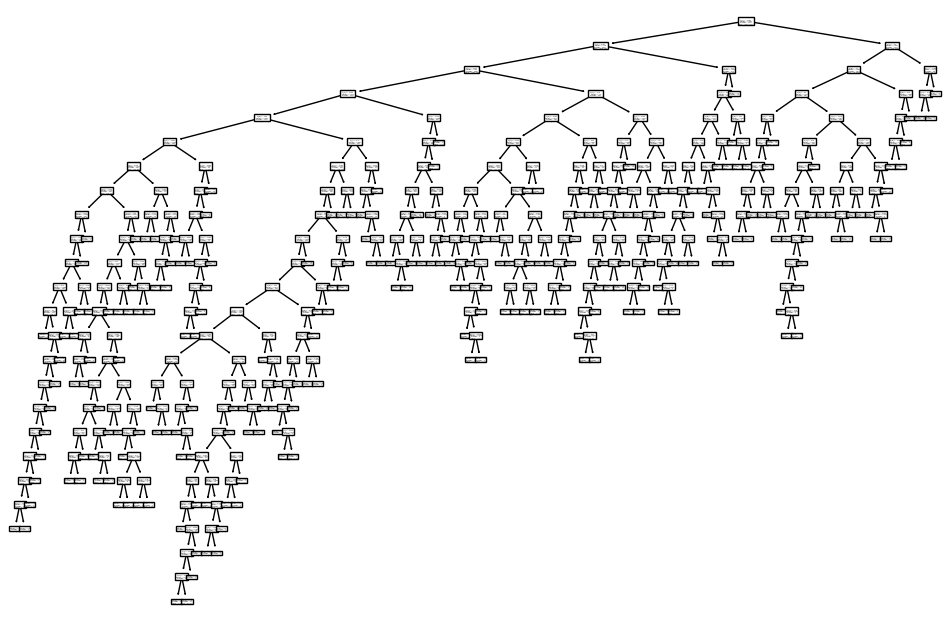

In [13]:
test_set = df.sample(frac=0.05)
train_set = df.drop(test_set.index)

for data in [df, test_set, train_set]:
    print(f'Rows: {data.shape[0]}, Columns: {data.shape[1]}')

from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier(criterion='entropy');
clf = clf.fit(train_set.drop(columns='Y'), train_set['Y']);
tree.plot_tree(clf);

### Decision Trees vs Logistic Regression

Notes based on Tom Mitchell ML 10-701 course at CMU